In [153]:
import numpy as np
import pandas as pd

In [154]:
df1 = pd.read_excel('glass.xlsx', sheet_name="glass")
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# 1. Exploratory Data Analysis (EDA):

In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [156]:
df1.shape

(214, 10)

In [157]:
df1.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [158]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [159]:
num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Type']

for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = df1[(df1[col] < lower) | (df1[col] > upper)][col]
    
    print(f"{col}: {len(outliers)} outliers")

RI: 17 outliers
Na: 7 outliers
Mg: 0 outliers
Al: 18 outliers
Si: 12 outliers
K: 7 outliers
Ca: 26 outliers
Ba: 38 outliers
Fe: 12 outliers


In [160]:
df1.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# 2: Data Visualization:

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

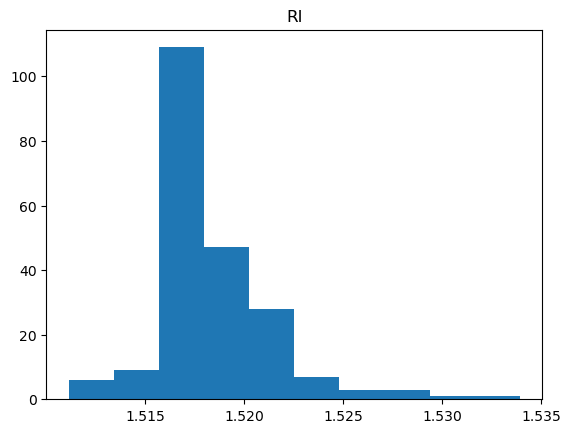

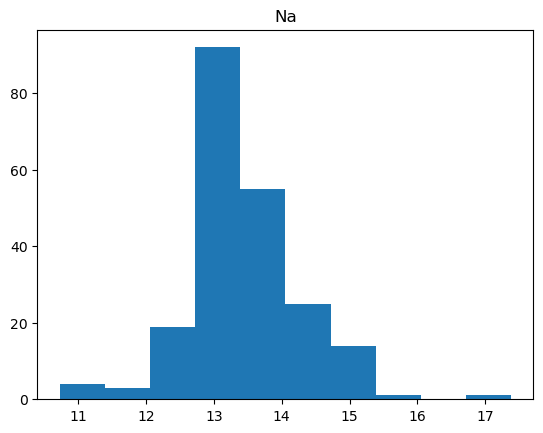

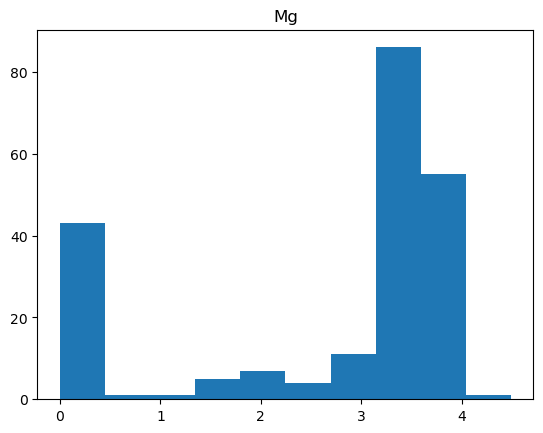

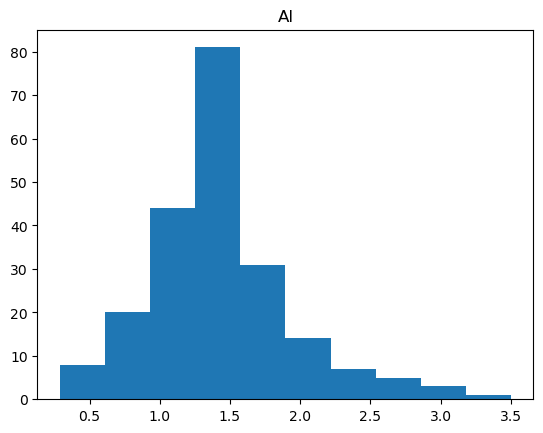

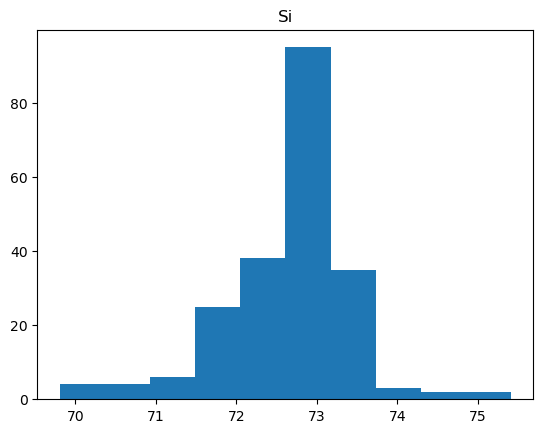

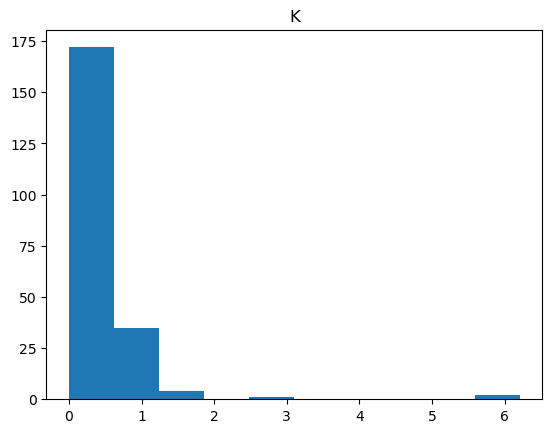

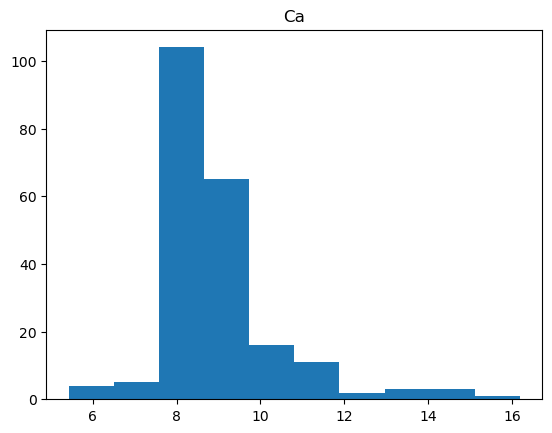

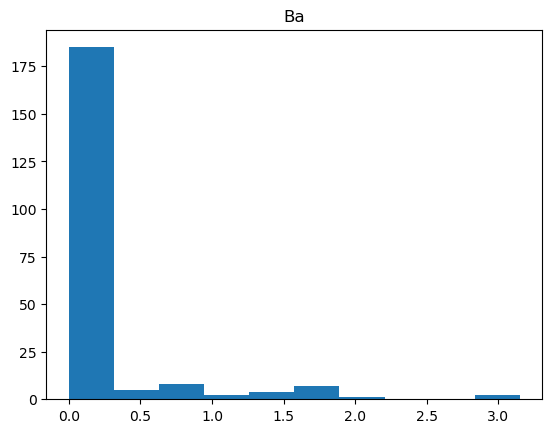

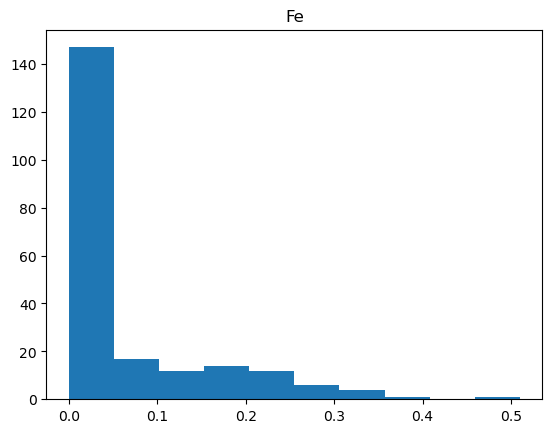

In [162]:
# Histogram

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Type']

for col in num_cols:
    plt.hist(df1[col])
    plt.title(col)
    plt.show()

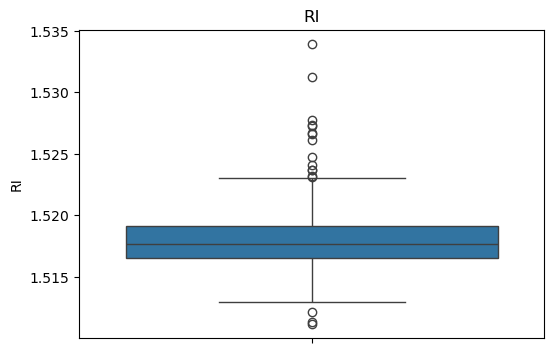

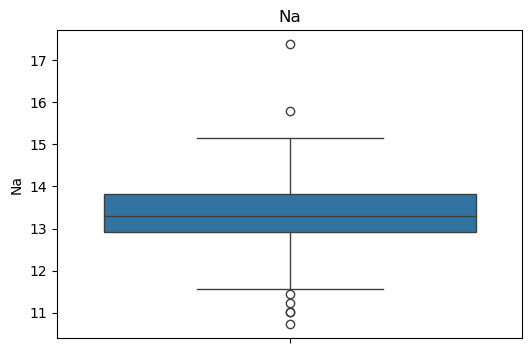

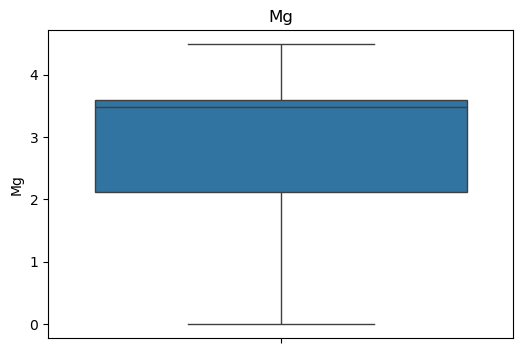

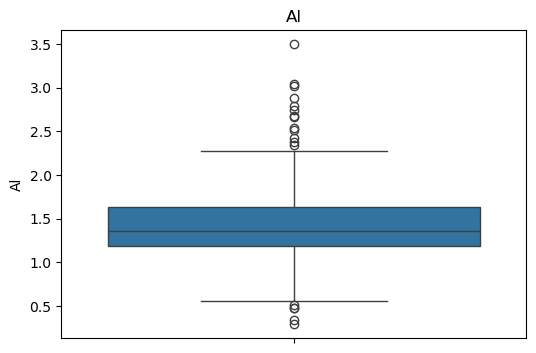

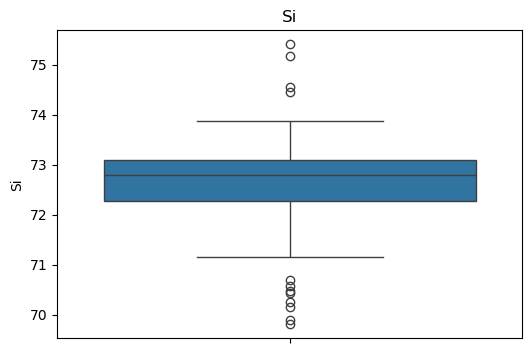

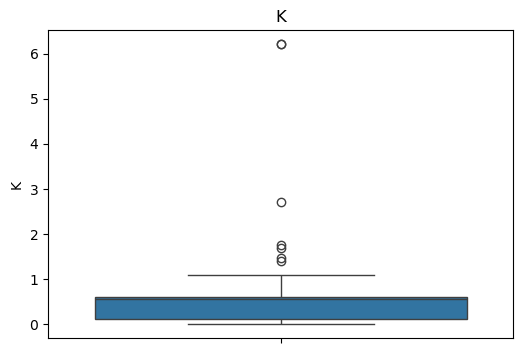

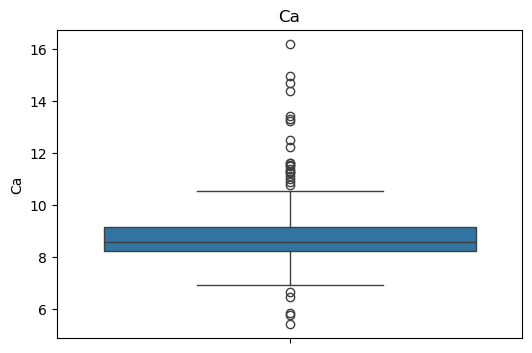

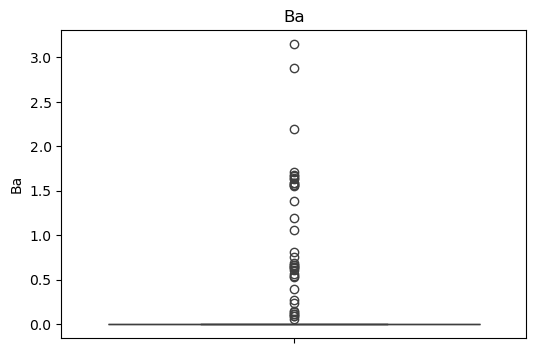

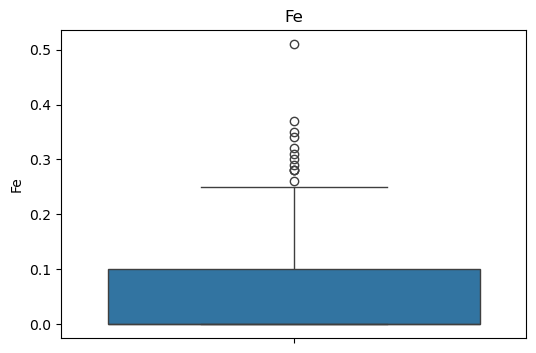

In [163]:
# Box Plot

num_cols = df1.select_dtypes(include=['int64', 'float64']).columns
num_cols = [cols for cols in num_cols if cols != 'Type']

import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize = (6, 4))
    sns.boxplot(df1[col])
    plt.title(col)
    plt.show()

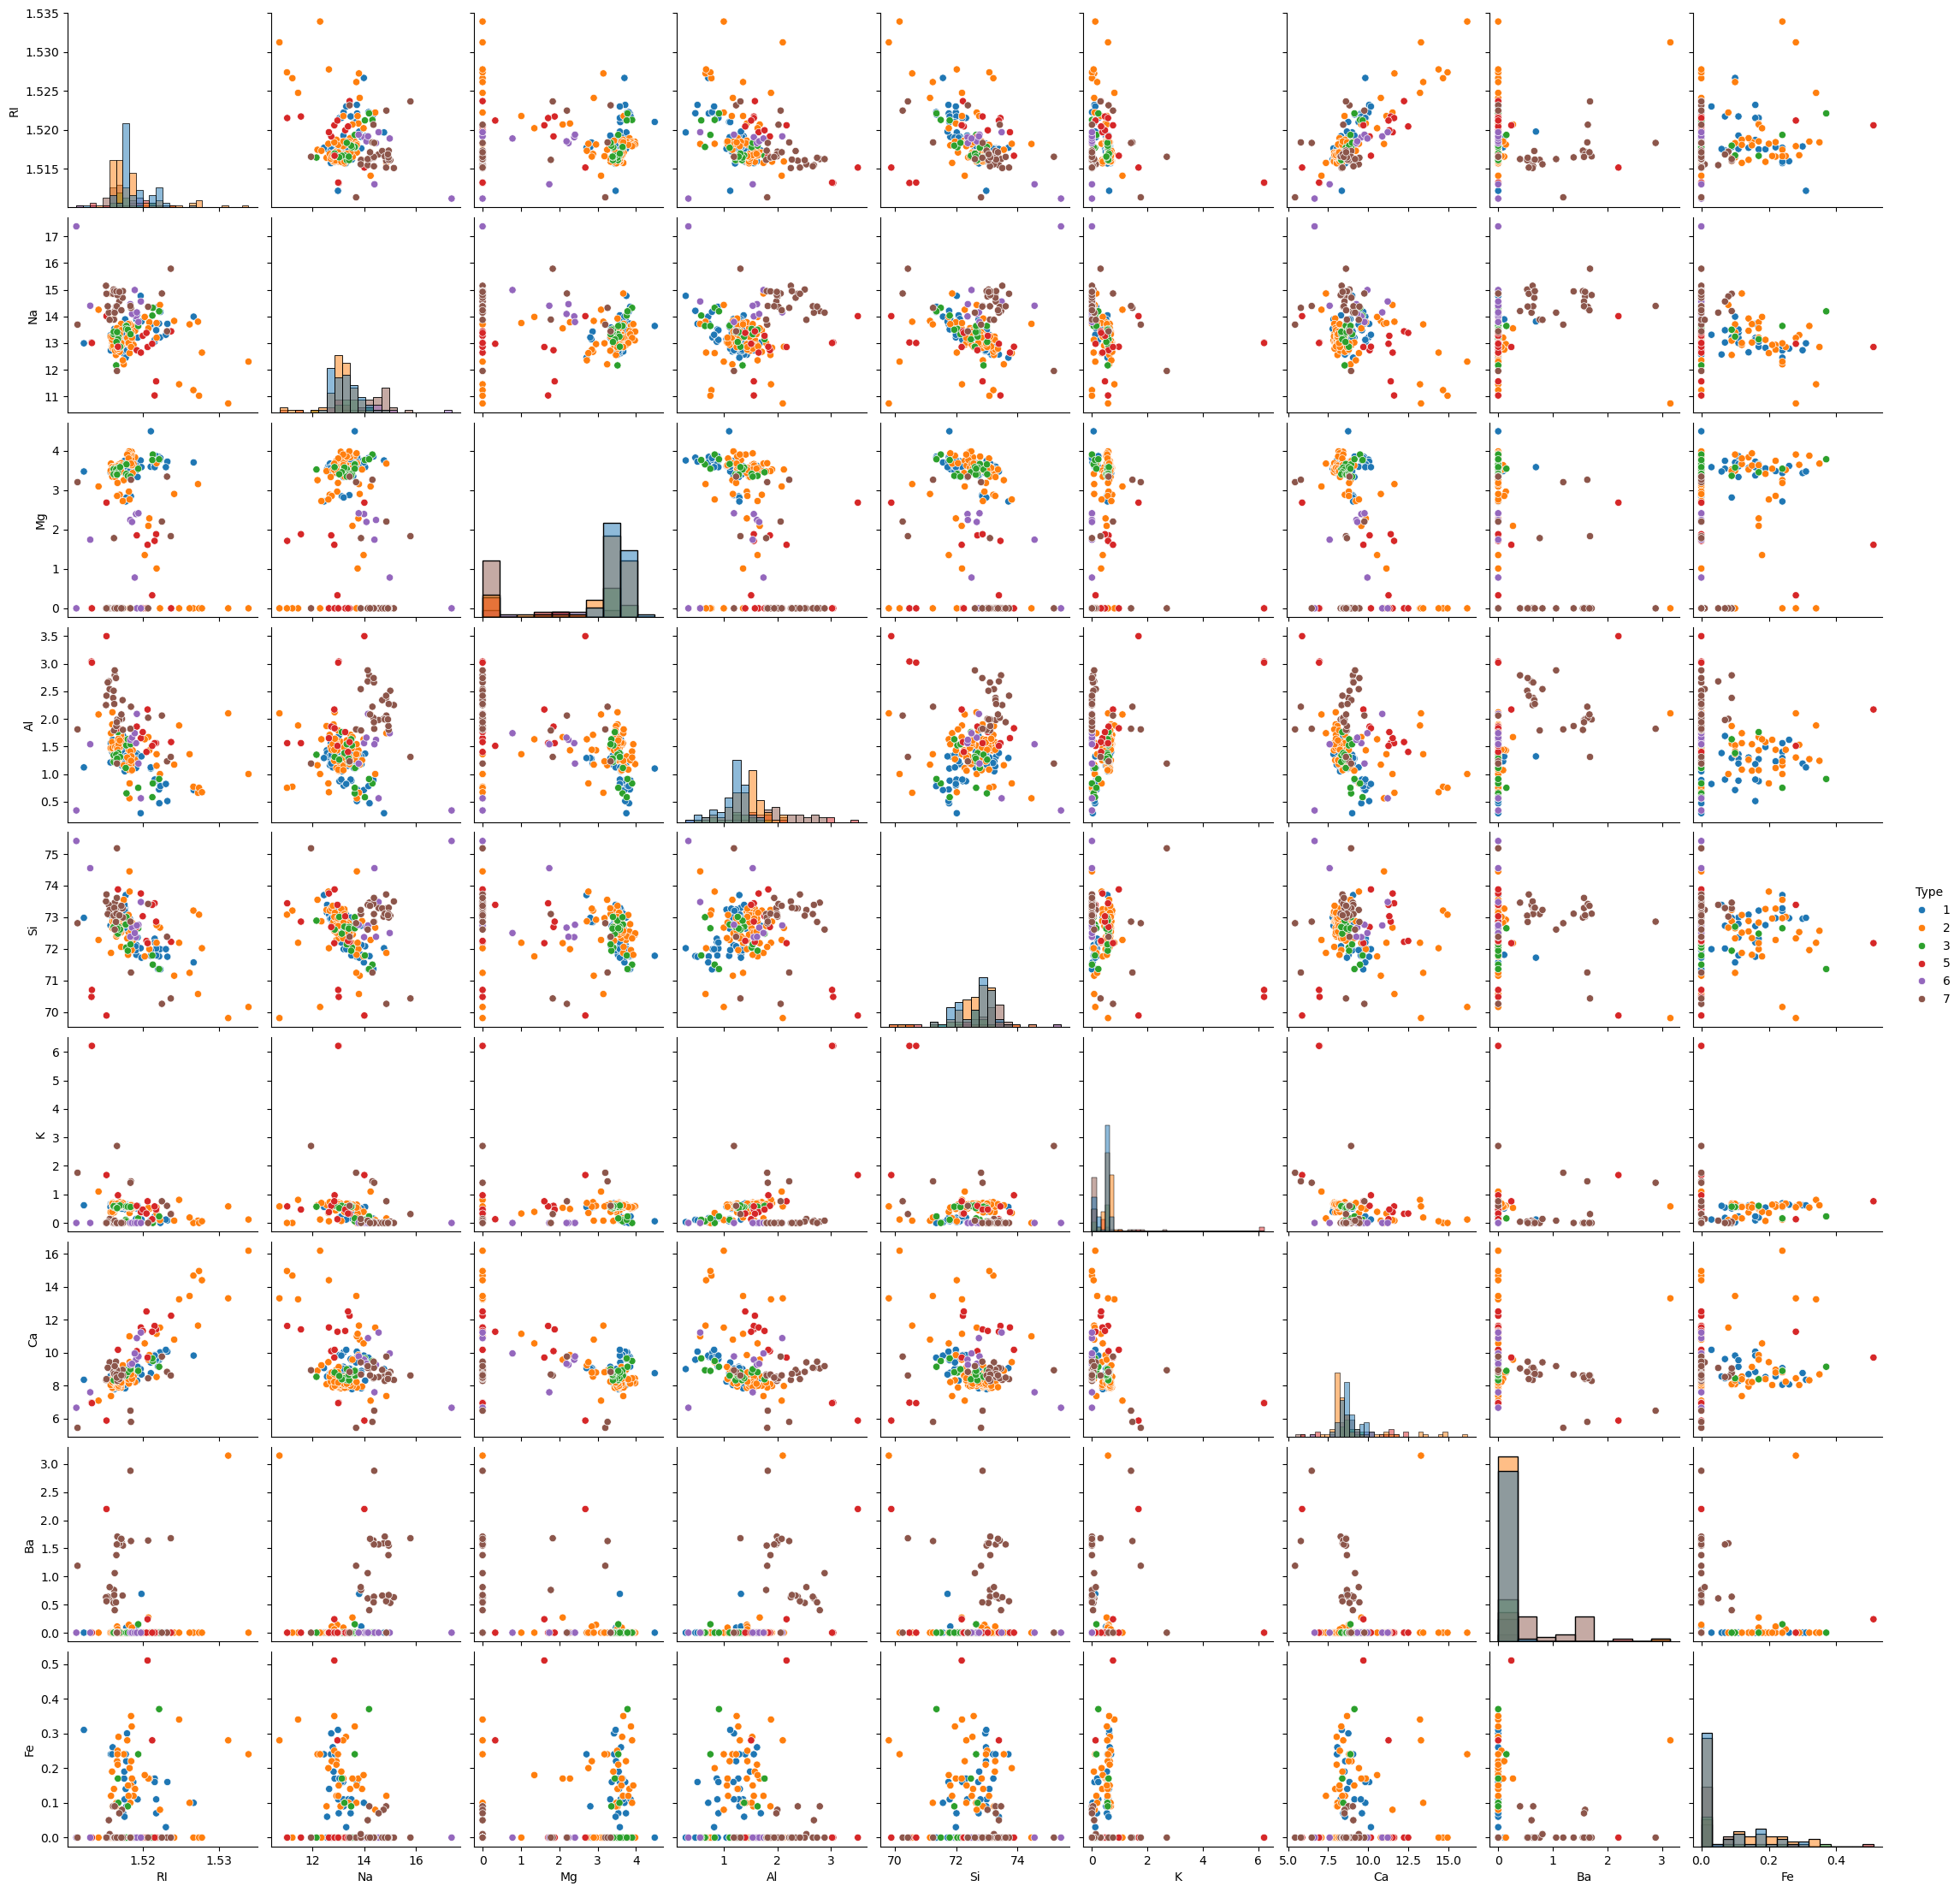

In [164]:
# Pair PLot.

sns.pairplot(df1, hue='Type', diag_kind='hist', palette='tab10')
plt.show()

In [165]:
# Correlation.

df1.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


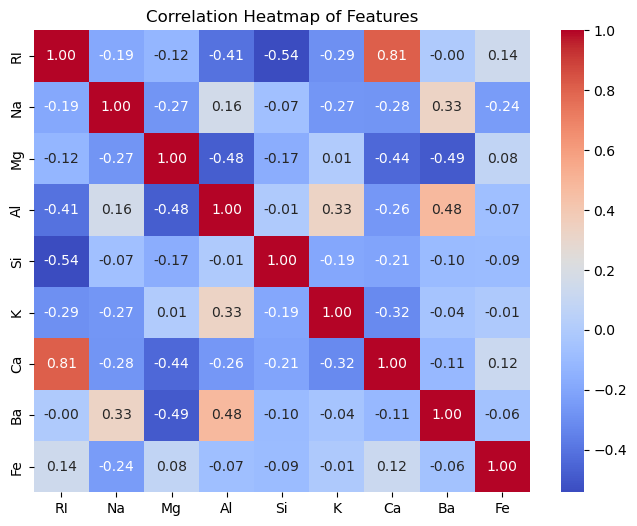

In [166]:
# Heatmap.

# Correlation Heatmap.

num_cols = df1.select_dtypes(include = 'number').columns
num_cols = [cols for cols in num_cols if cols != 'Type']

plt.figure(figsize=(8, 6))
sns.heatmap(df1[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Features")
plt.show()

# Observations:

Some features (like Mg, Ba) vary significantly between types.

Correlation heatmap shows some features have strong relationships, e.g., Al and Mg.

# 3: Data Preprocessing

In [167]:
df1.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Handling Missing Values :
No missing values detected, so no action required.

# Encoding Categorical Variables :
All features are numeric; no categorical encoding needed.

In [170]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [171]:
X = df1.drop('Type', axis=1)
y = df1['Type']

In [172]:
X_scaled = ss.fit_transform(X)

# Handling Class Imbalance :

In [173]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [174]:
# Feature and target

X = df1.drop("Type", axis=1)
y = df1["Type"]

In [175]:
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [176]:
# Apply SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [177]:
# Check class distribution after balancing

print("Before SMOTE:", Counter(y))
print("After SMOTE:", Counter(y_resampled))

Before SMOTE: Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9})
After SMOTE: Counter({1: 76, 2: 76, 3: 76, 5: 76, 6: 76, 7: 76})


In [178]:
#Handle Class Imbalance with SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [179]:
X_resampled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.72451755, -0.91553393, -1.86551055, ...,  0.10637241,
         0.25262473, -0.5483051 ],
       [-0.42593408,  1.83194779, -1.86551055, ..., -0.32133902,
         2.8785826 , -0.5864509 ],
       [-0.39853528,  1.54067499, -1.86551055, ..., -0.90267718,
         3.88227023, -0.5864509 ]])

In [180]:
 y_resampled

0      1
1      1
2      1
3      1
4      1
      ..
451    7
452    7
453    7
454    7
455    7
Name: Type, Length: 456, dtype: int64

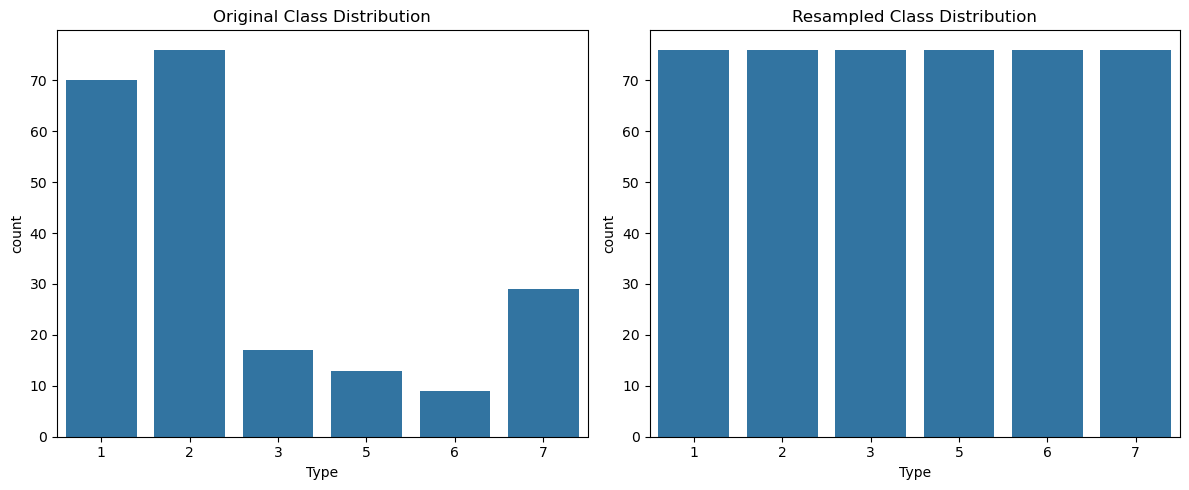

In [181]:
#Visualize before & after class distribution

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y)
plt.title("Original Class Distribution")

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title("Resampled Class Distribution")

plt.tight_layout()
plt.show()

# 4: Random Forest Model Implementation

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42, stratify = y_resampled)

In [184]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 42)

In [185]:
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [186]:
y_pred_test = rfc.predict(x_test)

In [187]:
from sklearn.metrics import classification_report

In [188]:
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_test))


Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.93      0.87      0.90        15
           3       0.93      0.87      0.90        15
           5       0.94      0.94      0.94        16
           6       1.00      1.00      1.00        16
           7       0.93      0.93      0.93        15

    accuracy                           0.91        92
   macro avg       0.92      0.91      0.91        92
weighted avg       0.92      0.91      0.91        92



# 5. Bagging and Boosting Methods

In [189]:
from sklearn.ensemble import BaggingClassifier

In [190]:
#Bagging Classifier

bag = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [191]:
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

In [192]:
y_pred_bag = bag.predict(x_test)

In [193]:
print("\nBagging Classifier Report:")
print(classification_report(y_test, y_pred_bag))


Bagging Classifier Report:
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.93      0.87      0.90        15
           3       0.92      0.73      0.81        15
           5       0.94      1.00      0.97        16
           6       1.00      1.00      1.00        16
           7       1.00      0.93      0.97        15

    accuracy                           0.90        92
   macro avg       0.91      0.90      0.90        92
weighted avg       0.91      0.90      0.90        92



In [194]:
from sklearn.ensemble import AdaBoostClassifier

In [195]:
#Boosting Classifier (AdaBoost)

boost = AdaBoostClassifier(n_estimators=100, random_state=42)

In [196]:
boost.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [197]:
y_pred_boost = boost.predict(x_test)

In [198]:
print("\nBoosting (AdaBoost) Classifier Report:")
print(classification_report(y_test, y_pred_boost))


Boosting (AdaBoost) Classifier Report:
              precision    recall  f1-score   support

           1       0.39      0.60      0.47        15
           2       0.25      0.20      0.22        15
           3       0.47      0.47      0.47        15
           5       0.75      0.38      0.50        16
           6       0.67      1.00      0.80        16
           7       0.60      0.40      0.48        15

    accuracy                           0.51        92
   macro avg       0.52      0.51      0.49        92
weighted avg       0.52      0.51      0.49        92



# 1. Explain Bagging and Boosting methods. How is it different from each other.

Bagging (Bootstrap Aggregating) :
Bagging, short for Bootstrap Aggregating, is an ensemble learning technique used to improve the accuracy and robustness of machine learning models. It aims to reduce variance and minimize the risk of overfitting, especially for high-variance models like decision trees. The core idea behind bagging is to create multiple subsets of the training data by randomly sampling with replacement. Each of these subsets is used to train a separate model independently. Once all models are trained, their predictions are aggregated to produce the final result—using majority voting for classification tasks or averaging for regression problems. A widely used example of bagging is the Random Forest algorithm, which trains multiple decision trees on different random subsets and combines their outputs to make a final decision.

Boosting :
Boosting is another powerful ensemble technique, but unlike bagging, it builds models sequentially. In boosting, each new model is trained to correct the mistakes made by the previous one. It assigns more weight to the data points that were incorrectly predicted in earlier rounds, forcing the subsequent models to focus more on those difficult cases. This sequential learning process continues for a fixed number of iterations or until the model achieves satisfactory performance. The final prediction is a weighted combination of all individual models. Boosting is effective in reducing bias and often achieves higher accuracy than bagging methods. However, because it continuously learns from errors, it can also be prone to overfitting if not properly regularized. Popular boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost.

Bagging vs. Boosting
While both bagging and boosting are ensemble techniques that combine multiple models to enhance performance, they differ fundamentally in their approach. Bagging focuses on reducing variance by training multiple models in parallel on different subsets of the data. Each model has equal weight in the final prediction. In contrast, boosting reduces bias by training models sequentially, where each model builds on the errors of its predecessor. Additionally, boosting pays more attention to challenging samples by increasing their importance in subsequent iterations. Bagging is generally more stable and less likely to overfit, while boosting, though often more accurate, must be tuned carefully to avoid overfitting.

# 2. Explain how to handle imbalance in the data.

Handling Class Imbalance
Class imbalance is a common issue in classification problems where some classes are significantly underrepresented compared to others. This imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. To address this, several techniques can be applied. One approach is resampling, which includes oversampling the minority class or undersampling the majority class. A popular oversampling method is SMOTE (Synthetic Minority Over-sampling Technique), which generates synthetic samples for the minority class to balance the dataset.

In conclusion, both bagging and boosting are valuable ensemble strategies, each with its own strengths—bagging for reducing variance and boosting for reducing bias. When dealing with imbalanced datasets, it's essential to use techniques such as SMOTE, class weighting, and proper evaluation metrics to ensure fair and effective model performance. Combining ensemble learning with strategies to handle class imbalance leads to more accurate, robust, and generalizable classification models.